<a href="https://colab.research.google.com/github/riyaroy2086/ML-Projects/blob/main/Dog_vs_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#To Install the kaggle library
!pip install kaggle # preinstalled in g collab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#configuring the path kaggle file path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
#Importing the dataset
# the kaggle api usage
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:21<00:00, 44.1MB/s]
100% 812M/812M [00:21<00:00, 39.1MB/s]


In [11]:
#Extracting the compressed file (dataset)
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Dataset extraction complete!")

Dataset extraction complete!


In [12]:
#Extracting the compressed file (dataset)
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Dataset extraction complete!")

Dataset extraction complete!


In [13]:
#counting the files in train folder
import os 
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print("No. of imgs:",file_count)

No. of imgs: 25000


In [14]:
#Printing the name of imgs
file_names= os.listdir('/content/train')
print(file_names)

['dog.9771.jpg', 'dog.12377.jpg', 'cat.834.jpg', 'cat.4895.jpg', 'cat.623.jpg', 'dog.10572.jpg', 'cat.7012.jpg', 'dog.12481.jpg', 'dog.698.jpg', 'cat.7149.jpg', 'cat.8204.jpg', 'dog.6140.jpg', 'cat.6791.jpg', 'dog.9527.jpg', 'dog.7681.jpg', 'dog.11000.jpg', 'dog.6947.jpg', 'cat.4695.jpg', 'dog.9903.jpg', 'dog.10153.jpg', 'dog.7252.jpg', 'cat.483.jpg', 'cat.2694.jpg', 'dog.10238.jpg', 'dog.813.jpg', 'dog.2223.jpg', 'cat.2643.jpg', 'cat.4227.jpg', 'cat.278.jpg', 'cat.902.jpg', 'dog.1550.jpg', 'dog.10815.jpg', 'dog.6918.jpg', 'dog.10103.jpg', 'dog.1854.jpg', 'dog.3821.jpg', 'cat.11603.jpg', 'dog.6148.jpg', 'dog.4549.jpg', 'dog.7773.jpg', 'cat.4426.jpg', 'dog.7322.jpg', 'dog.11783.jpg', 'cat.5903.jpg', 'cat.3902.jpg', 'dog.888.jpg', 'dog.5995.jpg', 'dog.1669.jpg', 'cat.12154.jpg', 'dog.9178.jpg', 'dog.2309.jpg', 'dog.3938.jpg', 'cat.10635.jpg', 'cat.5366.jpg', 'dog.7194.jpg', 'cat.5479.jpg', 'cat.2053.jpg', 'dog.2456.jpg', 'cat.5783.jpg', 'dog.6046.jpg', 'dog.374.jpg', 'dog.7269.jpg', 'cat

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

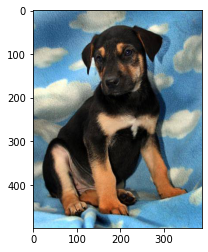

In [16]:
#Displaying the imgs of the dog
img = mpimg.imread('/content/train/dog.9903.jpg')
imgplt=plt.imshow(img) ## loading into a variable first otherwise error
plt.show(imgplt)

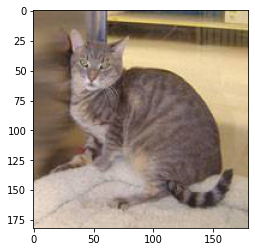

In [17]:
#Displaying the imgs of the cat
img = mpimg.imread('/content/train/cat.4695.jpg')
imgplt=plt.imshow(img) ## loading into a variable first otherwise error
plt.show(imgplt)

In [18]:
file_names= os.listdir('/content/train')
for i in range(5) :
  name=file_names[i]
  print(name[0:3])

dog
dog
cat
cat
cat


In [19]:
file_names= os.listdir('/content/train')


dog_count = 0 
cat_count = 0

for img_file in file_names:
  name=img_file[0:3]
  if name == 'dog':
    dog_count+=1
  else: 
    cat_count+=1

print("No. of dog imgs:",dog_count)
print("No. of cat imgs:", cat_count)    


No. of dog imgs: 12500
No. of cat imgs: 12500


In [20]:
# resizing the imgs 
## Crfeating a dir for the resized imgs
os.mkdir('/content/image resized')


In [21]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

In [22]:
for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  #Opening the resized image and then
  #Resizing 
  img = Image.open(img_path)
  img = img.resize((224,224)) 
  img= img.convert('RGB') # color colored img
  
  newImgPath= resized_folder+filename
  img.save(newImgPath)

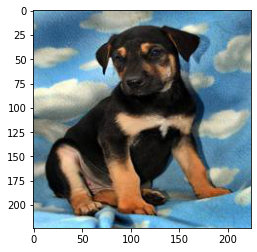

In [23]:
#Displaying the resized imgs of the dog
img = mpimg.imread('/content/image resized/dog.9903.jpg')
imgplt=plt.imshow(img) ## loading into a variable first otherwise error
plt.show(imgplt)

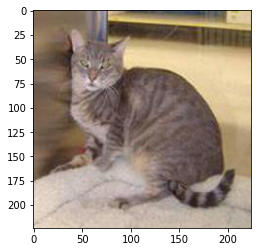

In [24]:
#Displaying the resized imgs of the cat
img = mpimg.imread('/content/image resized/cat.4695.jpg')
imgplt=plt.imshow(img) ## loading into a variable first otherwise error
plt.show(imgplt)

In [25]:
#Craeting labels of resized imgs
# Dogs -> 1 
# Cats -> 0

filenames = os.listdir('/content/image resized/')

labels =[]
for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'cat':
    labels.append(0)
  else:
    labels.append(1)




In [26]:
print(filenames[0:5])
print(len(filenames))

['dog.9771.jpg', 'dog.12377.jpg', 'cat.834.jpg', 'cat.4895.jpg', 'cat.623.jpg']
2000


In [27]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 0, 0]
2000


In [28]:

print("labelling done !") 

labelling done !


In [29]:
# Couting dog and cat imgs in 2k
values,counts = np.unique(labels,return_counts=True) # passing the labels list
print(values)
print(counts)

[0 1]
[ 983 1017]


In [30]:

# Converting resized imgs to numpy arrays for the models to understand
import cv2
import glob

image_directory ='/content/image resized/'
image_extension = ['jpg']
files =[]
#To check other extensions of img files in the resized image folder
[files.extend(glob.glob(image_directory+'*.'+e)) for e in image_extension]
reqd_imgs =np.asarray([cv2.imread(file) for file in files])

In [31]:
print(reqd_imgs)

[[[[ 43  32  34]
   [ 48  37  39]
   [ 50  39  41]
   ...
   [166 227 223]
   [167 228 224]
   [168 229 225]]

  [[ 29  18  20]
   [ 35  24  26]
   [ 37  26  28]
   ...
   [164 225 221]
   [165 226 222]
   [166 227 223]]

  [[ 25  14  16]
   [ 31  20  22]
   [ 33  22  24]
   ...
   [161 222 218]
   [163 224 220]
   [163 224 220]]

  ...

  [[136 122 124]
   [141 127 129]
   [147 133 135]
   ...
   [243 248 247]
   [243 248 247]
   [242 247 246]]

  [[143 127 128]
   [146 130 131]
   [130 114 115]
   ...
   [243 248 247]
   [241 246 245]
   [238 243 242]]

  [[158 142 143]
   [157 141 142]
   [124 108 109]
   ...
   [246 251 250]
   [242 247 246]
   [239 244 243]]]


 [[[  2  35  31]
   [  0  25  21]
   [ 10  40  35]
   ...
   [ 55  51  50]
   [ 83  80  76]
   [107 104 100]]

  [[  1  34  30]
   [ 10  41  38]
   [ 32  62  57]
   ...
   [ 50  46  45]
   [ 70  67  63]
   [ 87  84  80]]

  [[  0  24  21]
   [ 23  54  51]
   [ 53  80  77]
   ...
   [ 46  42  41]
   [ 57  54  50]
   [ 66  63

In [32]:
print(reqd_imgs.shape)

(2000, 224, 224, 3)


In [33]:
#Train -test split
X = reqd_imgs
Y = np.asarray(labels)

In [34]:
#with the help of transfer learning
# we are able to produce good prediction 
#even with small dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [36]:
#Scaling the data -> all the vals b/w 0 and 1
X_train_scale = X_train/255
X_test_scale = X_test/255

In [37]:
print(X_train_scale,X_test_scale)

[[[[0.14117647 0.23529412 0.19607843]
   [0.14117647 0.23529412 0.19607843]
   [0.11764706 0.21176471 0.16470588]
   ...
   [0.50588235 0.64313725 0.65490196]
   [0.4627451  0.61176471 0.61960784]
   [0.40784314 0.55686275 0.56470588]]

  [[0.14509804 0.23921569 0.2       ]
   [0.15294118 0.24705882 0.20784314]
   [0.12156863 0.21568627 0.16862745]
   ...
   [0.50980392 0.65882353 0.66666667]
   [0.47058824 0.61960784 0.62745098]
   [0.41568627 0.56470588 0.57254902]]

  [[0.15686275 0.25098039 0.21176471]
   [0.16862745 0.2627451  0.22352941]
   [0.1372549  0.23137255 0.18431373]
   ...
   [0.50588235 0.65882353 0.66666667]
   [0.47058824 0.62352941 0.63137255]
   [0.43137255 0.58431373 0.59215686]]

  ...

  [[0.56078431 0.6745098  0.72941176]
   [0.47058824 0.58431373 0.63921569]
   [0.50588235 0.61960784 0.6745098 ]
   ...
   [0.39607843 0.56078431 0.61176471]
   [0.38823529 0.54901961 0.60784314]
   [0.34509804 0.50588235 0.56470588]]

  [[0.58431373 0.69803922 0.75294118]
   [0.5

In [38]:
#Building the neural network now
#Importing a pre-trained model
import tensorflow as tf
import tensorflow_hub as hub

In [39]:
model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(model,input_shape=(224,224,3),trainable=False)
#using pretrained model with rgb

In [40]:
#Traing the model now
classes = 2 # 0 and 1
model =tf.keras.Sequential([
    pretrained_model,tf.keras.layers.Dense(classes) #o/p layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
#Compiling the model
model.compile(
    optimizer = 'adam',
    # using sparse categorical entropy
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #accuracy score
    metrics=['acc']
)

In [42]:
model.fit(X_train_scale,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 69s 1s/step - loss: 0.2141 - acc: 0.9112
Epoch 2/5
50/50 [==============================] - 64s 1s/step - loss: 0.0655 - acc: 0.9787
Epoch 3/5
50/50 [==============================] - 48s 950ms/step - loss: 0.0469 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 48s 958ms/step - loss: 0.0342 - acc: 0.9931
Epoch 5/5
50/50 [==============================] - 47s 948ms/step - loss: 0.0287 - acc: 0.9950


In [43]:
score , acc= model.evaluate(X_test_scale,Y_test)
# Comparing the scaled Test data and the real labels corresponding it
print("Test Loss = ",score)
print("Testdata Accuracy" , acc)

13/13 [==============================] - 21s 1s/step - loss: 0.0746 - acc: 0.9700
Test Loss =  0.07460810989141464
Testdata Accuracy 0.9700000286102295


Path ofthe image to be predicted: /content/June_odd-eyed-cat.jpg


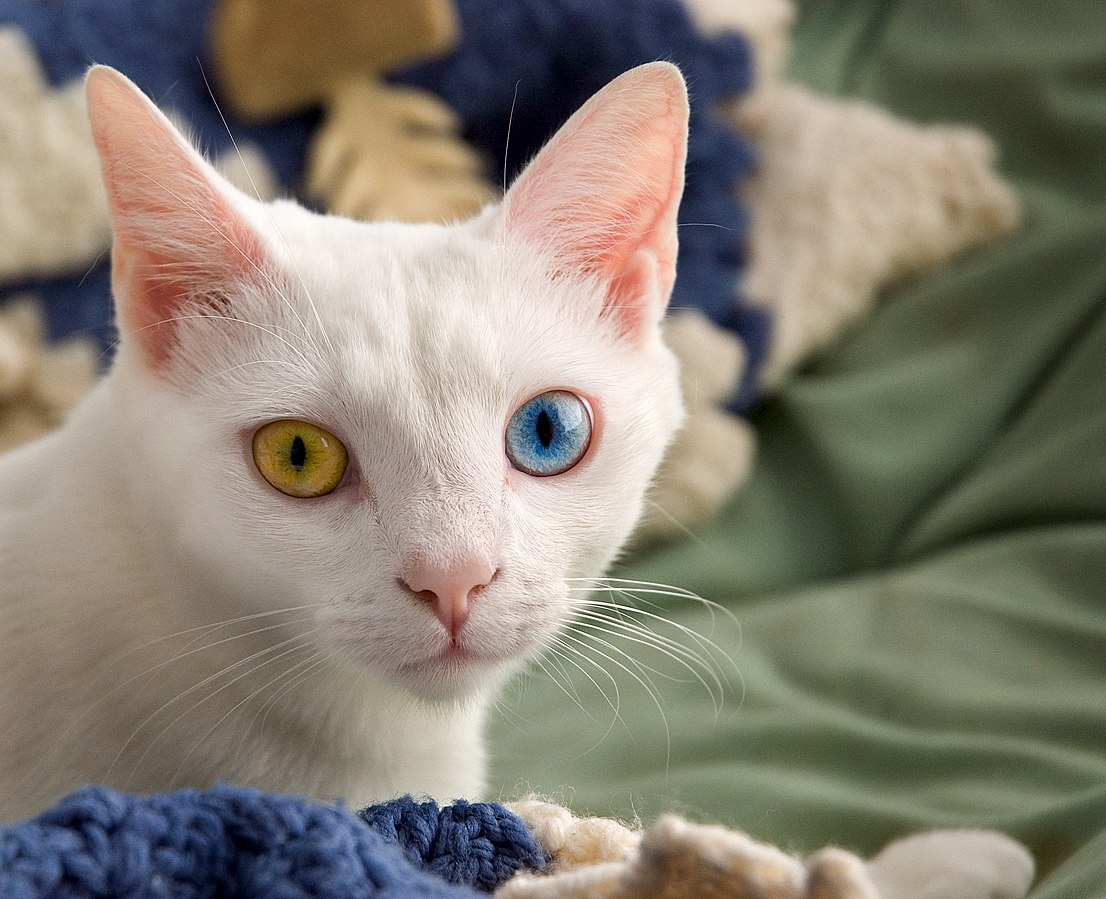

1/1 [==============================] - 0s 106ms/step
[[ 4.8725557 -5.8495226]]
0
It's a cat!


In [50]:
#Now building the predictive system
user_input = input('Path ofthe image to be predicted: ')
#jpg img file(in thtis case) to numpy array
input_img = cv2.imread(user_input)
# Displaying the image
# from google.collab.patches
cv2_imshow(input_img)
#resizing the img using cv2 instead of PIL here
input_img_resize = cv2.resize(input_img,(224,224))
# Scaling the image b/w 0 and 1
input_img_scale = input_img_resize/255
# reshaping the img and reminding the model that we are using only 1 img
img_reshaped = np.reshape(input_img_scale,[1,224,224,3])
# final prediction -> 0 or 1
input_pred = model.predict(img_reshaped)
print(input_pred)
# arg max is Math.max here
pred_label = np.argmax(input_pred)
print(pred_label)

if(pred_label == 0) :
  print("It's a cat!")
else :
  print("It's a dog!")
   
